### **Stock Time Series Data Prediction Using LSTM Algorithm**

##### **By: GABRIELLE FELICIA ARIYANTO**

In [ ]:
# Import the required libraries
!pip install gdown
import gdown
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the timestamp format to 'Day, Date Month Year' and put it in a variable called time_fmt
time_fmt = "%A, %d %B %Y"

In [ ]:
# Download the stock file via Google Drive link (still in zip form)
file_id = '105N_V2E5jrPcZTAS7-s96y5XhYriDwd3'
file_url = f'https://drive.google.com/uc?id={file_id}'
zipfile_path = 'DatasetB.zip'
gdown.download(file_url, zipfile_path, quiet=False)

# extract file
with zipfile.ZipFile(zipfile_path,'r') as z:
  z.extractall()

Downloading...
From: https://drive.google.com/uc?id=105N_V2E5jrPcZTAS7-s96y5XhYriDwd3
To: C:\Users\gabri\DatasetB.zip
100%|███████████████████████████████████████████████████████████████████████████████| 301k/301k [00:00<00:00, 20.3MB/s]


## **Exploratory Data Analysis, Data Pre-processing & Data Splitting**

### **Amazon Dataset**

#### **Load Dataset**

In [ ]:
# Read the Amazon data and put it into a variable named `df_amzn`
df_amzn = pd.read_csv('./Dataset B/AMZN.csv', parse_dates=["Date"])
# Check `df_amzn` dataframe
df_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


#### **Remove unnecessary columns**

This time, the columns that will be used for the stock predictions are only the `Date` and `Close` columns, then the other columns will be discarded

In [ ]:
# Drop unnecessary columns
df_amzn.drop(['High','Low','Adj Close','Volume','Open'], axis=1, inplace = True)
# Check whether the column has been removed
df_amzn

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
5753,2020-03-26,1955.489990
5754,2020-03-27,1900.099976
5755,2020-03-30,1963.949951
5756,2020-03-31,1949.719971


#### **View Date Range On Amazon Dataset**

In [ ]:
# Create a function called `min_max_date` to view the date range in Amazon's stock data
def min_max_date(df):
  min_date = min(df['Date']).strftime(time_fmt)
  max_date = max(df['Date']).strftime(time_fmt)
  return min_date, max_date

# Print the result
min_date_AMZN, max_date_AMZN = min_max_date(df_amzn)
print('Range Date: {0} to {1}'.format(min_date_AMZN,max_date_AMZN))

Range Date: Thursday, 15 May 1997 to Wednesday, 01 April 2020


The date range for Amazon stock data is from Thursday, May 15, 1997 to Wednesday, April 1, 2020.

#### **Check Duplicated Values**

In [ ]:
df_amzn['Date'].duplicated().any()

False

In Amazon stock data, there are no duplicate values/columns

#### **View statistical descriptions of stock prices (`Close`'s column values) in Amazon datasets**

In [ ]:
df_amzn['Close'].describe()

count    5758.000000
mean      340.417580
std       523.140207
min         1.395833
25%        37.562500
50%        81.599998
75%       334.290001
max      2170.219971
Name: Close, dtype: float64

From the output above, the following results are obtained:
- The `Close` values in Amazon stock data range from 1.4 to 2170.22.
- The `Close` value in Amazon stock data has an average of 340.42 and a standard deviation of 523.14.
- The median value for the `Close` column in the Amazon stock data is 81.6, the first quartile value is 37.56 and the third quartile value is 334.3

#### **Amazon Data Types's for "Time Series"**

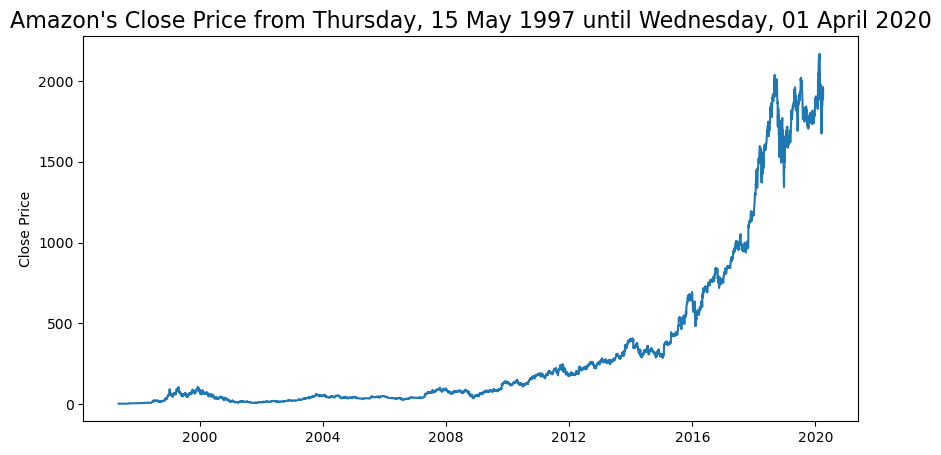

In [ ]:
''' Create a function named `close_price_pattern`
to see the type of time series data depicted with a plot '''
def close_price_pattern(df, min_date, max_date, title):
  plt.figure(figsize=(10,5))
  plt.plot(df['Date'], df['Close'])
  plt.ylabel("Close Price")
  plt.title("{2}'s Close Price from {0} until {1}".format(min_date,max_date,title), fontsize=16)
  plt.show()

close_price_pattern(df_amzn, min_date_AMZN, max_date_AMZN, 'Amazon')

From the plotting results above, it can be said that the Amazon data has a time series **trend** type. Where the Amazon data has a clear long-term increase in the value of `Close` (the value of `Close` has an upward trend).

#### **Average `Close` Value in Amazon Data Each Year**

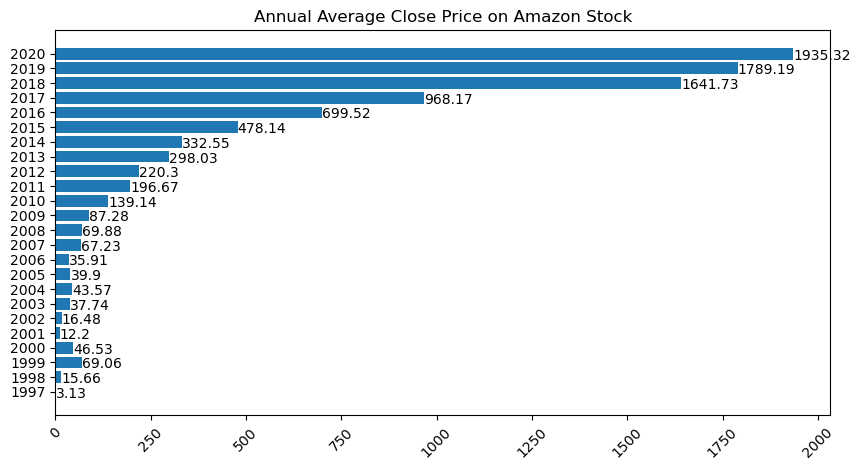

In [ ]:
"""
 Create a function called avg_close_price_bar to view the average closing price value
 (`Close`) each year in each data
"""
def avg_close_price_bar(df, Title):
  data_per_year = {}
  for i in range(len(df)):
    curr_year = df['Date'][i].strftime('%Y')
    if curr_year not in data_per_year.keys():
      data_per_year[curr_year] = []
    data_per_year[curr_year].append(df['Close'][i])

  # print(data_per_year)
  avg_per_year = {}
  for key in data_per_year.keys():
    sum_per_year = sum(data_per_year[key])
    avg_per_year[key] = sum_per_year/len(data_per_year[key])
  # print(avg_per_year)

  key = list(avg_per_year.keys())
  value = list(avg_per_year.values())
  # print(key, value)
  plt.figure(figsize=(10,5))
  bars = plt.barh(key,value)
  plt.xticks(rotation=45)
  for bar in bars:
    plt.annotate(round(bar.get_width(),2), xy=(bar.get_width(),bar.get_y()),fontsize=10)
  plt.title(f'Annual Average Close Price on {Title} Stock')
  plt.show()

# See the average `Close` value for each year in Amazon data
avg_close_price_bar(df_amzn, 'Amazon')

Based on the output above, the following results are obtained:
- Average `Close` value or highest closing price from Amazon data found in 2020 with a value of 1935.32
- The average value of `Close` or the lowest closing price from Amazon data was in 1997 with a value of 3.13
- The average `Close` value or closing price of Amazon data seems to always increase from year to year.

#### **Cleaning, Windowing and setting Horizon On Data**

After checking the Amazon stock data, there is data for the missing day of the week or the Monday data that you want to predict is empty. This empty day data is probably caused by public holidays and so on, so there is no trading activity. So at this stage, I divided the data into 2 parts, namely:
- Data INVALID: Incomplete data for a week or empty Monday data that will be predicted.
- Data VALID: The data to be used for prediction (Data for the entire week is complete, and there is Monday data to be predicted). Valid data here is grouped by day, from Monday to Friday, in sequential rows.

**Valid data will be used to train the model and make predictions, while invalid data will not be used and will be dropped/discarded.**

The data division is accompanied by the **assumption** that if the Monday following Friday in the data is not immediately in the following week, the data is still considered valid (no gaps) and predictions will still be made. This is because if it's a national/public holidays, there is no stock trading activity, and the prices do not change.

At this stage, I also separate the data into two parts: **input and output, with a window size of 5 (Monday to Friday) and a horizon of 1 for Monday only.**

In [ ]:
"""
Create a function named clean_and_windowing_data for
cleans and organizes windows and horizons on data

"""
def clean_and_windowing_data(df, title):
  x = []
  y = []
  invalid_dates = []

  days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
  idx = 0
  idx_day = 0
  while idx<len(df):
    if df['Date'][idx].strftime('%A') == days[0] and idx+idx_day < len(df):
      len_week = 0
      for idx_day, day in enumerate(days):
        if df['Date'][idx+idx_day].strftime('%A') != days[idx_day]:
          break
        len_week += 1
      if len_week != len(days) or (idx +len_week < len(df) and df['Date'][idx+len_week].strftime('%A') != days[0]):
        invalid_dates.append(df['Date'][idx])
        idx += 1
      else:
        x.append(np.array(df[idx:idx+len_week]))
        y.append(np.array(df.iloc[idx+len_week]))
        idx += len(days)
    else:
      invalid_dates.append(df['Date'][idx])
      idx += 1

  missing = []
  inv_date = 0
  day = 0
  while inv_date < len(invalid_dates):
    if day == len(days):
      if(invalid_dates[inv_date].strftime('%A') != days[0]):
        missing.append(f' ==> TO PREDICT: MISSING  {days[0]} ({invalid_dates[inv_date].strftime(time_fmt)})')
      else:
        missing.append(f' ==> TO PREDICT: {invalid_dates[inv_date].strftime(time_fmt)}')
    day %= len(days)
    if(invalid_dates[inv_date].strftime('%A') != days[day]):
      missing.append('MISSING  {0}'.format(days[day]))
      day += 1
    else:
      missing.append(invalid_dates[inv_date].strftime(time_fmt))
      day += 1
      inv_date += 1
  is_missing_last_predict = 0
  while day<len(days):
    missing.append('MISSING  {0}'.format(days[day]))
    day += 1
    is_missing_last_predict = 1
  if is_missing_last_predict:
    missing.append(f' ==> TO PREDICT: MISSING  {days[0]}')

  # Separate valid data (for predictions) and invalid data (which will not be used)

  # Invalid data
  print('==========================================================================================================================')
  print('INVALID {0} DATA (ADA DATA HARI YANG HILANG DALAM SEMINGGU ATAU DATA HARI SENIN YANG AKAN DIPREDIKSI KOSONG)'.format(title))
  print('==========================================================================================================================')
  print("Total Invalid Weeks: ", round(len(missing)/6))
  print("Total Invalid Days: ", len(invalid_dates))
  #  ONLY SHOWING THE TOP 5 DATA
  for i in range(0,len(missing[:30]),6):
    print(', '.join(missing[i:i+6]))


  print()
  # Valid data
  print('=========================================================================================================================================')
  print('VALID WINDOW AND HORIZON {0} DATA (WINDOW: SENIN-JUMAT & HORIZON: SENIN SELANJUTNYA) --> YANG AKAN DIGUNAKAN UNTUK PREDIKSI'.format(title))
  print('=========================================================================================================================================')
  print("Total Valid Weeks: ", len(x))
  print("Total Valid Days: ", len(x)*5)
  # ONLY SHOWING THE TOP 5 DATA
  for x_idx, x_row in enumerate(x[:5]):
    for x_elem_idx, x_elem in enumerate(x_row):
      if x_elem_idx > 0:
        print(",", end=' ')
      print(x_elem[0].strftime(time_fmt), end='')
    print(" ==> TO PREDICT:", y[x_idx][0].strftime(time_fmt))

  print()
  # Check what percentage of data is not used
  print(f"Total Persentase Data yang akan dibuang akibat tidak valid untuk prediksi: {round((len(invalid_dates)/len(df['Date']))*100,2)}%")
  return x, y

# Call function `clean_and_windowing_data` and save the data that has been cleaned and separated into 2 parts input and output
# Then store it to a variables named `amzn_x` for input data and `amzn_y` for output data
amzn_x, amzn_y = clean_and_windowing_data(df_amzn, 'AMAZON')

# The function below is only for model evaluation plot purposes (actual vs predicted value plot)
def dropDateX(x):
  x_new = []
  for x_row in x:
    new_x_row = []
    for elem in x_row:
      new_x_row.append(elem[1])
    x_new.append(new_x_row)
  return x_new

def dropDateY(x):
  x_new = []
  for x_row in x:
    new_x_row = []
    new_x_row.append(x_row[1])
    x_new.append(new_x_row)
  return x_new

# only for model evaluation plot purposes (actual vs predicted value plot)
dated_amzn_x,dated_amzn_y = amzn_x, amzn_y
amzn_x = dropDateX(amzn_x)
amzn_y = dropDateY(amzn_y)

INVALID AMAZON DATA (ADA DATA HARI YANG HILANG DALAM SEMINGGU ATAU DATA HARI SENIN YANG AKAN DIPREDIKSI KOSONG)
Total Invalid Weeks:  314
Total Invalid Days:  1353
MISSING  Monday, MISSING  Tuesday, MISSING  Wednesday, Thursday, 15 May 1997, Friday, 16 May 1997,  ==> TO PREDICT: Monday, 19 May 1997
Monday, 19 May 1997, Tuesday, 20 May 1997, Wednesday, 21 May 1997, Thursday, 22 May 1997, Friday, 23 May 1997,  ==> TO PREDICT: MISSING  Monday (Tuesday, 27 May 1997)
MISSING  Monday, Tuesday, 27 May 1997, Wednesday, 28 May 1997, Thursday, 29 May 1997, Friday, 30 May 1997,  ==> TO PREDICT: Monday, 30 June 1997
Monday, 30 June 1997, Tuesday, 01 July 1997, Wednesday, 02 July 1997, Thursday, 03 July 1997, MISSING  Friday,  ==> TO PREDICT: Monday, 25 August 1997
Monday, 25 August 1997, Tuesday, 26 August 1997, Wednesday, 27 August 1997, Thursday, 28 August 1997, Friday, 29 August 1997,  ==> TO PREDICT: MISSING  Monday (Tuesday, 02 September 1997)

VALID WINDOW AND HORIZON AMAZON DATA (WINDOW: SE

After data preprocessing for Amazon data, around 23.5% of invalid data will be discarded or not used to make predictions. There were 314 weeks and 1353 days of invalid data and 881 weeks and 4405 days of valid data.

#### **Data Splitting**

At this stage, I split the data into an **80% training set, a 10% validation set, and a 10% testing set**.

In [ ]:
"""
Create a function called `splitting` to split the data into
80% train, 10% test and 10% validation set
"""
def splitting(x,y, title, verbose=True):
  train_size = 0.80
  test_size = 0.10
  val_size = 0.10
  train_limit = round((len(x)*80)/100)
  x_train = x[:train_limit]
  y_train = y[:train_limit]

  rest_size = 0.20
  rest_limit = round((len(x)*20)/100)

  x_rest= x[train_limit:]
  y_rest = y[train_limit:]

  split_size = round(test_size/(val_size+test_size)*len(x_rest))
  x_test, x_val = x_rest[:split_size], x_rest[split_size:]
  y_test, y_val = y_rest[:split_size], y_rest[split_size:]

  if verbose:
    print('x_train {0}: {1}'.format(title,len(x_train)))
    print('x_val {0}: {1}'.format(title,len(x_val)))
    print('x_test {0}: {1} '.format(title, len(x_test)))
    print('==================')
    print('y_train {0}: {1} '.format(title,len(y_train)))
    print('y_val {0}: {1} '.format(title,len(y_val)))
    print('y_test {0}: {1} '.format(title, len(y_test)))
  return np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val), np.array(x_test), np.array(y_test)

# Split the dataset into train, test and val set
x_train_amzn, y_train_amzn, x_val_amzn, y_val_amzn, x_test_amzn, y_test_amzn = splitting(amzn_x, amzn_y,'Amazon')
# Splitting for model evaluation plot purposes (actual vs predicted value plot)
_, _, _, _, _, y_test_dated_amzn = splitting(dated_amzn_x, dated_amzn_y,'Amazon', verbose = False)

x_train Amazon: 705
x_val Amazon: 88
x_test Amazon: 88 
y_train Amazon: 705 
y_val Amazon: 88 
y_test Amazon: 88 


### **CISCO Data**


#### **Load Dataset**

In [ ]:
# Read the Cisco data and put it into a variable named `df_csco`
df_csco = pd.read_csv('./Dataset B/CSCO.csv',  parse_dates=["Date"])
# Check `df_csco`
df_csco.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-02-16,0.0,0.079861,0.073785,0.077257,0.059806,940636800
1,1990-02-20,0.0,0.079861,0.074653,0.079861,0.061822,151862400
2,1990-02-21,0.0,0.078993,0.075521,0.078125,0.060478,70531200
3,1990-02-22,0.0,0.081597,0.078993,0.078993,0.061150,45216000
4,1990-02-23,0.0,0.079861,0.078125,0.078559,0.060814,44697600


#### **Remove unnecessary columns**

The columns that will be used for the stock predictions are only the `Date` and `Close` columns, then the other columns will be discarded

In [ ]:
# Drop unnecessary columns
df_csco.drop(['High','Low','Adj Close','Volume','Open'], axis=1, inplace = True)
# Check whether the column has been removed
df_csco

,Date,Close
0,1990-02-16,0.077257
1,1990-02-20,0.079861
2,1990-02-21,0.078125
3,1990-02-22,0.078993
4,1990-02-23,0.078559
...,...,...
7584,2020-03-26,40.580002
7585,2020-03-27,38.820000
7586,2020-03-30,40.320000
7587,2020-03-31,39.310001


#### **View Date Range On Cisco Dataset**

In [ ]:
# Call the `min_max_date` function to view the date range in the Cisco data and store the result into a variable
min_date_CSCO, max_date_CSCO = min_max_date(df_csco)
# Print the date range available in Cisco stock data
print('Range Date: {0} to {1}'.format(min_date_CSCO,max_date_CSCO))

Range Date: Friday, 16 February 1990 to Wednesday, 01 April 2020


The date range in Cisco stock data spans from Friday, February 16, 1990, to Wednesday, April 1, 2020.

#### **Check Duplicated Values**

In [ ]:
df_csco['Date'].duplicated().any()

False

In Cisco stock data, there are no duplicate columns/values

#### **View statistical descriptions of stock prices (`Close`'s column values) in Cisco datasets**

In [ ]:
df_csco['Close'].describe()

count    7589.000000
mean       20.399541
std        14.906589
min         0.071181
25%         8.479167
50%        19.680000
75%        27.120001
max        80.062500
Name: Close, dtype: float64

From the output above, the following results are obtained:
- The `Close` value in Cisco stock data ranges from 0.07 to 80.06.
- The `Close` value in Cisco stock data has an average of 20.4 and a standard deviation of 14.9.
- The median value for the `Close` column in the Cisco stock data is 19.7, the first quartile value is 8.5 and the third quartile value is 27.1.

#### **Cisco Data Types's for "Time Series"**

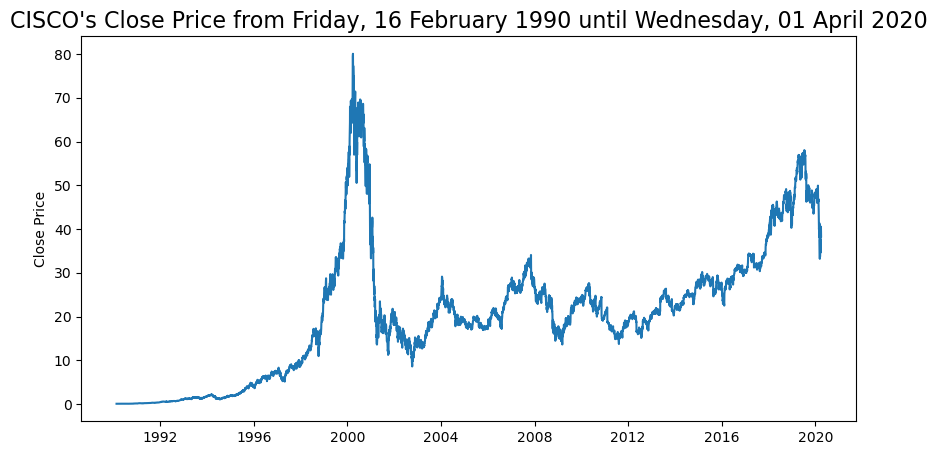

In [ ]:
close_price_pattern(df_csco, min_date_CSCO, max_date_CSCO, 'CISCO')

From the plotting results above, it can be said that Cisco data has a **cyclic** *time series* type. Where Cisco data has irregular fluctuations or has an irregular pattern (up and down).

#### **Average `Close` Value in Cisco Data Each Year**

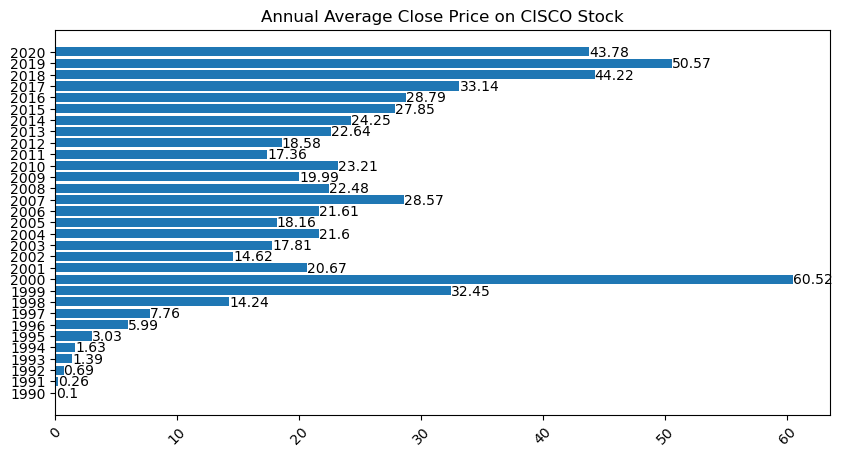

In [ ]:
avg_close_price_bar(df_csco, 'CISCO')

Based on the output above, the following results are obtained:
- The average value of `Close` or the highest closing price from Cisco data found in 2000 with a value of 60.52
- The average value of `Close` or the lowest closing price from Cisco data was in 1990 with a value of 0.1
- The average `Close` value or closing stock price of Cisco data has a fluctuating pattern (up and down) from year to year.

#### **Cleaning, Windowing and setting Horizon On Data**

After checking Cisco stock data, there are missing data for certain days of the week, or the Monday data to be predicted is empty. This missing data is likely due to holidays and other non-trading days. Therefore, at this stage, I split the data into two parts:
- Data INVALID: Incomplete data for a week or empty Monday data to be predicted.
- Data VALID: The data to be used for prediction (Data for the entire week is complete, and there is Monday data to be predicted). Valid data here is grouped by day, from Monday to Friday, in sequential rows.

**Valid data will be used to train the model and make predictions, while invalid data will not be used and will be dropped/discarded.**

The data division is accompanied by the **assumption** that if the Monday following Friday in the data is not immediately in the following week, the data is still considered valid (no gaps) and predictions will still be made. This is because if it's a national/public holidays, there is no stock trading activity, and the prices do not change

At this stage, I also separate the data into two parts: **input and output, with a window size of 5 (Monday to Friday) and a horizon of 1 for Monday only.**

In [ ]:
"""
Call the function named `clean_and_windowing_data` to
clean and organize windows and horizons on Cisco data and save them to variables named `csco_x` for input data and `csco_y` for output data
"""
csco_x, csco_y = clean_and_windowing_data(df_csco, 'CISCO')

# only for model evaluation plot purposes (actual vs predicted value plot)
dated_csco_x,dated_csco_y = csco_x, csco_y
csco_x = dropDateX(csco_x)
csco_y = dropDateY(csco_y)

INVALID CISCO DATA (ADA DATA HARI YANG HILANG DALAM SEMINGGU ATAU DATA HARI SENIN YANG AKAN DIPREDIKSI KOSONG)
Total Invalid Weeks:  397
Total Invalid Days:  1709
MISSING  Monday, MISSING  Tuesday, MISSING  Wednesday, MISSING  Thursday, Friday, 16 February 1990,  ==> TO PREDICT: MISSING  Monday (Tuesday, 20 February 1990)
MISSING  Monday, Tuesday, 20 February 1990, Wednesday, 21 February 1990, Thursday, 22 February 1990, Friday, 23 February 1990,  ==> TO PREDICT: Monday, 09 April 1990
Monday, 09 April 1990, Tuesday, 10 April 1990, Wednesday, 11 April 1990, Thursday, 12 April 1990, MISSING  Friday,  ==> TO PREDICT: Monday, 21 May 1990
Monday, 21 May 1990, Tuesday, 22 May 1990, Wednesday, 23 May 1990, Thursday, 24 May 1990, Friday, 25 May 1990,  ==> TO PREDICT: MISSING  Monday (Tuesday, 29 May 1990)
MISSING  Monday, Tuesday, 29 May 1990, Wednesday, 30 May 1990, Thursday, 31 May 1990, Friday, 01 June 1990,  ==> TO PREDICT: Monday, 02 July 1990

VALID WINDOW AND HORIZON CISCO DATA (WINDOW:

After preprocessing the Cisco data, approximately 22.5% of invalid data will be discarded and not used for predictions. There are 397 weeks and 1,709 days of invalid data, and 1,176 weeks and 5,880 days of valid data.

#### **Data Splitting**

At this stage, I split the data into an 80% training set, a 10% validation set, and a 10% testing set.

In [ ]:
# Call the `splitting` function created above to divide the Cisco data into 80% training, 10% validation and 10% testing sets
x_train_csco, y_train_csco, x_val_csco, y_val_csco, x_test_csco, y_test_csco = splitting(csco_x, csco_y, 'CISCO')
# Splitting for model evaluation plot purposes (actual vs predicted value plot)
_, _, _, _, _, y_test_dated_csco = splitting(dated_csco_x, dated_csco_y,'CISCO', verbose=False)

x_train CISCO: 941
x_val CISCO: 117
x_test CISCO: 118 
y_train CISCO: 941 
y_val CISCO: 117 
y_test CISCO: 118 


## **Modeling**

### **Model 1 - LSTM**

Creating a model with an LSTM layer having **50 units and the final layer as a Perceptron node with 1 unit, and using the ReLU activation function.**

#### **Function to create a model with LSTM**

In [ ]:
# Import library to create a model
import tensorflow as tf
from tensorflow.keras import layers
import os
from tensorflow.keras.callbacks import ModelCheckpoint

tf.random.set_seed(128)
# Set window value = 5
windows = 5
# Set horizon value = 1
horizon = 1

# Create a function named `baseline_modeling` to create a model with the LSTM
def baseline_modeling():
  input_layer = layers.Input(shape=(windows))
  '''
  LSTM requires 3D parameters namely [batch, timesteps (window), features (horizon)]
  However, now the input shape is still 2D, so I set the value axis=2 in the parameter
  layers.Lambda below so that the input becomes 3D ([batch, 5, 1])
  '''
  hidden_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(input_layer)
  hidden_layer = layers.LSTM(50, activation="relu")(hidden_layer)
  output_layer = layers.Dense(horizon)(hidden_layer)
  model_baseline = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="model_baseline")
  model_baseline.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

  return model_baseline

# Create a function called `evaluate` to store model evaluation values ​​(MAE, RMSE, MAPE)
def evaluate(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  MAE = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  RMSE = tf.sqrt(tf.keras.metrics.mean_squared_error(y_true, y_pred)).numpy()
  MAPE = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()
  return MAE, RMSE, MAPE

#### **Amazon Data**

##### **AMAZON Model 1 (LSTM)**

In [ ]:
# Create a model with an LSTM for Amazon data by calling the `baseline_modeling` function
amazon_baseline_model = baseline_modeling()
# See LSTM model 1 architecture for Amazon data
amazon_baseline_model.summary()

Model: "model_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_197 (InputLayer)       [(None, 5)]               0         
_________________________________________________________________
lambda_196 (Lambda)          (None, 5, 1)              0         
_________________________________________________________________
lstm_388 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_196 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


The model with the LSTM has the following architecture:
- Input Layer: The model accepts input with dimensions (None, 5)
- Lambda Layer: Input is transformed via the Lambda layer into (None, 5, 1)
- LSTM Layer: The results from the Lambda layer are passed to the LSTM layer which produces output with dimensions (None, 50).
- Dense Layer:  The output from the LSTM layer is passed to the Dense layer and produces the final output with dimensions (None, 1).

In [ ]:
# Train the model for Amazon data
amazon_baseline_model.fit(x=x_train_amzn, y=y_train_amzn,
            epochs=50,
            verbose=1,
            batch_size=64,
            validation_data=(x_val_amzn, y_val_amzn))

Epoch 1/50
12/12 [==============================] - 0s 28ms/step - loss: 103.7225 - val_loss: 1595.3638
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 89.8623 - val_loss: 1242.8875
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 72.8491 - val_loss: 797.4434
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 19.8528 - val_loss: 111.3913
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 7.8858 - val_loss: 55.5140
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 4.7877 - val_loss: 47.6178
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 3.8461 - val_loss: 53.0238
Epoch 8/50
12/12 [==============================] - 0s 9ms/step - loss: 3.8140 - val_loss: 40.6765
Epoch 9/50
12/12 [==============================] - 0s 10ms/step - loss: 3.3476 - val_loss: 34.6876
Epoch 10/50
12/12 [==============================] - 0s 9ms/step - loss: 3.3701 - val_loss:

In [ ]:
# Make predictions with the model that has been created
amazon_baseline_model_pred = tf.squeeze(amazon_baseline_model.predict(x_test_amzn))

# Evaluate the model with MAE values
MAE, RMSE, MAPE = evaluate(y_true=tf.squeeze(y_test_amzn), y_pred=amazon_baseline_model_pred)
print("MAE:",MAE)

MAE: 21.88553


After evaluation, the model with the LSTM architecture for Amazon data produces an MAE (Mean Absolute Error) value of 21.88553

#### **Cisco Data**

##### **CISCO Model 1 (LSTM)**

In [ ]:
# Create a model with a LSTM architecture for Cisco data
cisco_baseline_model = baseline_modeling()
# See LSTM model 1 architecture for Cisco data
cisco_baseline_model.summary()

Model: "model_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_198 (InputLayer)       [(None, 5)]               0         
_________________________________________________________________
lambda_197 (Lambda)          (None, 5, 1)              0         
_________________________________________________________________
lstm_389 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


The model with the LSTM architecture has the following architecture:
- Input Layer: The model accepts input with dimensions (None, 5)
- Lambda Layer: Input is transformed via the Lambda layer into (None, 5, 1)
- LSTM Layer: The results from the Lambda layer are passed to the LSTM layer which produces output with dimensions (None, 50).
- Dense Layer: The output from the LSTM layer is passed to the Dense layer and produces the final output with dimensions (None, 1).

In [ ]:
# Train model for Cisco data
cisco_baseline_model.fit(x=x_train_csco, y=y_train_csco,
            epochs=50,
            verbose=1,
            batch_size=64,
            validation_data=(x_val_csco, y_val_csco),
            callbacks=[ModelCheckpoint(filepath=os.path.join(cisco_baseline_model.name, 'CSCO'),verbose=0, save_best_only=True)])

Epoch 1/50
15/15 [==============================] - 2s 104ms/step - loss: 12.4138 - val_loss: 15.6490
Epoch 2/50
15/15 [==============================] - 1s 90ms/step - loss: 3.4273 - val_loss: 2.3651
Epoch 3/50
15/15 [==============================] - 1s 96ms/step - loss: 1.5202 - val_loss: 1.9614
Epoch 4/50
15/15 [==============================] - 1s 86ms/step - loss: 0.8985 - val_loss: 1.4151
Epoch 5/50
15/15 [==============================] - 1s 98ms/step - loss: 0.7256 - val_loss: 1.2017
Epoch 6/50
15/15 [==============================] - 1s 89ms/step - loss: 0.6431 - val_loss: 0.8827
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6041 - val_loss: 1.2015
Epoch 8/50
15/15 [==============================] - 1s 88ms/step - loss: 0.5698 - val_loss: 0.8366
Epoch 9/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5160 - val_loss: 0.9283
Epoch 10/50
15/15 [==============================] - 1s 99ms/step - loss: 0.4927 - val_loss: 0.7738
Epoch 1

In [ ]:
# Make predictions with the model that has been created
cisco_baseline_model_pred = tf.squeeze(cisco_baseline_model.predict(x_test_csco))

# Evaluate the model with MAE values
MAE, RMSE, MAPE = evaluate(y_true=tf.squeeze(y_test_csco), y_pred=cisco_baseline_model_pred)
print("MAE:",MAE)

MAE: 0.21593419


After evaluation, the model with the LSTM architecture for Cisco data produces a MAE (Mean Absolute Error) value of 0.21593419

## **Tuning**

In this stage hyperparameter tuning will be carried out. The following are the hyperparameters that will be tuned and their values:
1. batches: 16, 32
2. epochs: 100,150
3. units : 50, 75
4. optimizer = adam, adagrad
5. activation function = tanh, relu

#### Function to perform Hyperparameter Tuning on the baseline model

In [ ]:
import itertools

# Create a function called `configs` to find the best hyperparameter configuration
def configs():
  n_batch = [16,32]
  n_epochs = [100,150]
  n_units= [50,75]
  n_lstm_layer = [1,2,3]
  optimizers = ['adam', 'adagrad']
  activation_func = ['tanh','relu']


  return list(itertools.product(n_batch, n_epochs, n_units, optimizers, n_lstm_layer,activation_func))

# Create a function named `build_and_train_model` to build and train a model for each existing hyperparameter configuration
def build_and_train_model(x_train, y_train, x_val, y_val, hyperparam, fpath):
  n_batch, n_epochs, n_units, optimizers, n_lstm_layer, activation_func = hyperparam

  input_layer = layers.Input(shape=(windows))
  hidden_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(input_layer)
  for i in range(1,n_lstm_layer):
    hidden_layer = layers.LSTM(n_units, activation=activation_func, return_sequences=True)(hidden_layer)
  hidden_layer = layers.LSTM(n_units, activation=activation_func)(hidden_layer)
  output_layer = layers.Dense(horizon)(hidden_layer)
  new_model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='new_model')
  new_model.compile(loss="mae", optimizer=optimizers)

  kwargs = {
    'x':x_train, 'y':y_train,
    'epochs':n_epochs,'verbose':0,
    'batch_size': n_batch,
    'validation_data':(x_val, y_val)
  }

  if fpath != '':
    kwargs['callbacks']=ModelCheckpoint(filepath=fpath,verbose=0, save_best_only=True, mode='min')

  new_model.fit(**kwargs)

  return new_model

# Create a function called `evaluate_hyperparam` to evaluate the model for each existing hyperparameter configuration
def evaluate_hyperparam(x_train, y_train, x_val, y_val, x_test, y_test, hyperparam, title, seq_num):
  fpath = os.path.join('new_model', title, 'hyper'+('_'.join(map(str,hyperparam))))
  print(f"{seq_num+1}. EVALUATING HYPERPARAMETER", fpath)
  new_model = build_and_train_model(x_train, y_train, x_val, y_val, hyperparam, '')
  # new_model= tf.keras.models.load_model(fpath)

  new_model_pred = tf.squeeze(new_model.predict(x_test))

  MAE, RMSE, MAPE = evaluate(y_true=tf.squeeze(y_test), y_pred=new_model_pred)
  print("MAE:",MAE)
  return (MAE, new_model)

# Create a function called `gridSearch` to find the best hyperparameters (those with the smallest MAE values) to build a more optimal model
def gridSearch(x_train, y_train, x_val, y_val, x_test, y_test, hyperparams, title):
  best_model = None
  best_param = None
  best_score= 0
  for idx,hyperparam in enumerate(hyperparams):
    score, model = evaluate_hyperparam(x_train, y_train, x_val, y_val, x_test, y_test, hyperparam, title, idx)
    if idx == 0 or score < best_score:
      best_score = score
      best_model = model
      best_param = hyperparam
    print("BEST HYPERPARAMETER SO FAR", best_param, "WITH MAE", best_score)
  return best_score, best_model, best_param

##### **Amazon Data**

###### **Hyperparameter Tuning for AMAZON Data**

In [ ]:
hyperparams = configs()
print("GRID SEARCHING FOR",len(hyperparams),"HYPERPARAMETER CONFIGURATIONS")

# Perform hyperparameter tuning for Amazon data
search_results = gridSearch(\
    x_train_amzn, y_train_amzn, x_val_amzn, y_val_amzn, x_test_amzn, y_test_amzn, hyperparams, 'AMZN')
best_score, best_model, best_param = search_results

print(best_score, best_param)

GRID SEARCHING FOR 96 HYPERPARAMETER CONFIGURATIONS
1. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_1_tanh
MAE: 625.67993
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 625.67993
2. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_1_relu
MAE: 15.6833105
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'relu') WITH MAE 15.6833105
3. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_2_tanh
MAE: 616.0912
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'relu') WITH MAE 15.6833105
4. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_2_relu
MAE: 13.247703
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 2, 'relu') WITH MAE 13.247703
5. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_3_tanh
MAE: 614.3536
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 2, 'relu') WITH MAE 13.247703
6. EVALUATING HYPERPARAMETER new_model\AMZN\hyper16_100_50_adam_3_relu
MAE: 17.91853
BEST HYPERPARAMETER SO FAR (16, 100, 

After tuning, the best hyperparameter configuration that produces the smallest error (MAE: 9.1047735) is as follows:
- Number of Batches: 16
- Number of Epochs: 150
- Units: 75
- Optimizer: Adagrad
- Number of layers: 1
- Activation Function: Relu

In [ ]:
# View the model architecture with tuned hyperparameters
best_model.summary()

Model: "new_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
lambda_45 (Lambda)           (None, 5, 1)              0         
_________________________________________________________________
lstm_87 (LSTM)               (None, 75)                23100     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 76        
Total params: 23,176
Trainable params: 23,176
Non-trainable params: 0
_________________________________________________________________


The tuned model has the following architecture:
- Input Layer: Model receives input with dimensions (None, 5)
- Lambda Layer: Input is transformed through the Lambda layer to (None, 5, 1)
- LSTM Layer: The results from the Lambda layer are passed to the LSTM layer which produces output with dimensions (None, 75).
- Dense Layer: The output from the LSTM layer is forwarded to the Dense layer and produces the final output with dimensions (None, 1).

##### **Cisco Data**

###### **Hyperparameter Tuning for CISCO Data**

In [ ]:
hyperparams = configs()
print("GRID SEARCHING FOR",len(hyperparams),"HYPERPARAMETER CONFIGURATIONS")

# Perform hyperparameter tuning for Cisco data
search_results_for_cisco = gridSearch(\
    x_train_csco, y_train_csco, x_val_csco, y_val_csco, x_test_csco, y_test_csco, hyperparams, 'CSCO')
best_score_csco, best_model_csco, best_param_csco = search_results_for_cisco

print(best_score_csco, best_param_csco)

GRID SEARCHING FOR 96 HYPERPARAMETER CONFIGURATIONS
1. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_1_tanh
MAE: 0.2165199
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 0.2165199
2. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_1_relu
MAE: 0.26115343
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 0.2165199
3. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_2_tanh
MAE: 0.28138506
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 0.2165199
4. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_2_relu
MAE: 0.25390726
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 0.2165199
5. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_3_tanh
MAE: 0.2696423
BEST HYPERPARAMETER SO FAR (16, 100, 50, 'adam', 1, 'tanh') WITH MAE 0.2165199
6. EVALUATING HYPERPARAMETER new_model\CSCO\hyper16_100_50_adam_3_relu
MAE: 0.30263513
BEST HYPERPARAMETER SO FAR (16, 1

After tuning, the best hyperparameter configuration that produces the smallest error (MAE: 0.21261208) is as follows:
- Number of Batches: 32
- Number of Epochs: 150
- Units: 50
- Optimizer: Adam
- Number of layers: 3
- Activation Function: Relu

In [ ]:
# View the model architecture with tuned hyperparameters
best_model_csco.summary()

Model: "new_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_176 (InputLayer)       [(None, 5)]               0         
_________________________________________________________________
lambda_175 (Lambda)          (None, 5, 1)              0         
_________________________________________________________________
lstm_347 (LSTM)              (None, 5, 50)             10400     
_________________________________________________________________
lstm_348 (LSTM)              (None, 5, 50)             20200     
_________________________________________________________________
lstm_349 (LSTM)              (None, 50)                20200     
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_____________________________________________________

The tuned model has the following architecture:
- Input Layer: Model receives input with dimensions (None, 5)
- Lambda Layer: Input is transformed through the Lambda layer to (None, 5, 1)
- LSTM Layer 1: The results of the Lambda Layer (None, 5, 1) become input for LSTM Layer 1 (lstm_347), which produces an output with dimensions (None, 5, 50).
- LSTM Layer 2: The results of LSTM Layer 1 (None, 5, 50) become input for LSTM Layer 2 (lstm_348), which produces an output with dimensions (None, 5, 50).
- LSTM Layer 3: The results of LSTM Layer 2 (None, 5, 50) become input for LSTM Layer 3 (lstm_349), which produces an output with dimensions (None, 50).
- Dense Layer: The output from LSTM layer 3 is forwarded to the Dense layer and produces the final output with dimensions (None, 1).

**Explanation regarding the modified model from the LSTM architecture:**

In modifying the LSTM architecture, I conducted hyperparameter tuning using a custom-built GridSearch function to find the best hyperparameters. Subsequently, I rebuilt the model using the best-tuned hyperparameters. I employed tuning as an approach to achieve better model performance than the baseline architecture because tuning helps find the optimal parameters for creating a better model. Tuning can also assist in avoiding overfitting or underfitting. The metric I used to measure whether the model has improved or not is through its Mean Absolute Error (MAE) value. MAE represents the average absolute difference between the actual value and the predicted value, indicating how accurately the model predicts actual values in time series data. The lower the MAE value, the better the model's performance, and vice versa.

During the search for the best parameters, I conducted tuning on the batch size, number of epochs, number of units, number of layers, optimizer type, and activation function type.

The models trained using the best hyperparameters (from tuning) for each dataset have the following architectures:

**=============**
**AMAZON Data:**
**=============**
- **Number of Batches: 16**
- **Number of Epochs: 150**
- **Units: 75**
- **Optimizer: Adagrad**
- **Number of layers: 1**
- **Activation Function: Relu**

**=============**
**CISCO Data:**
**=============**
- **Number of Batches: 32**
- **Number of Epochs: 150**
- **Units: 50**
- **Optimizer: Adam**
- **Number of layers: 3**
- **Activation Function: Relu**


## **Model Evaluation**

### **Amazon Data**

#### **Model 1 (LSTM) Evaluation**

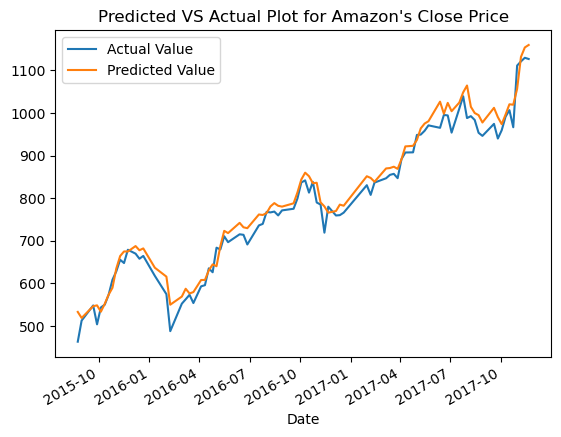


     ACTUAL VS PREDICTED VALUE TABLE FOR Amazon's Data       
                          Actual Value  Predicted Value Differences
Date                                                               
Monday, 24 August 2015      463.369995       533.216370  -69.846375
Monday, 31 August 2015      512.890015       519.046204   -6.156189
Monday, 21 September 2015   548.390015       546.631653    1.758362
Monday, 28 September 2015   504.059998       548.613586  -44.553589
Monday, 05 October 2015     543.679993       533.686096    9.993896
...                                ...              ...         ...
Monday, 23 October 2017     966.299988      1019.083435  -52.783447
Monday, 30 October 2017    1110.849976      1056.176636    54.67334
Monday, 06 November 2017   1120.660034      1131.206299  -10.546265
Monday, 13 November 2017   1129.170044      1153.367920  -24.197876
Monday, 20 November 2017   1126.310059      1159.200928  -32.890869

[88 rows x 3 columns]
3/3 [=========================

In [ ]:
# Create a function called `actual_vs_pred_plot` to plot actual values ​​vs predicted values
def actual_vs_pred_plot(actual, pred, title):
  # plt.plot(pred,label = 'predicted_value', color = 'red')
  actual_df = pd.DataFrame(actual, columns=['Date', 'Actual Value']).set_index('Date')
  actual_df['Predicted Value'] = pred
  pl = actual_df.plot()
  plt.title('Predicted VS Actual Plot for {0}\'s Close Price'.format(title))
  lines, labels = pl.get_legend_handles_labels()
  pl.legend(lines[:2], labels[:2])
  plt.show()
  print()
  print('=================================================================')
  print('     ACTUAL VS PREDICTED VALUE TABLE FOR {0}\'s Data       '.format(title))
  print('=================================================================')
  actual_df.index = actual_df.index.strftime(time_fmt)
  actual_df['Differences'] =  actual_df['Actual Value']-actual_df['Predicted Value']
  print(actual_df)

# Create a function called `print_eval_result` to print the rmse, mae, and mape values ​​of each model
def print_eval_result(MAE, RMSE, MAPE):
  print('===================')
  print('RMSE: ' , RMSE)
  print('===================')
  print('MAE: ' , MAE)
  print('==================')
  print('MAPE: ' , MAPE)
  print('==================')

# Create a function called `evaluate_model` to evaluate model performance
def evaluate_model(model, x_test, y_test, dated_y, title):
  model_pred = tf.squeeze(model.predict(x_test))

  MAE, RMSE, MAPE = evaluate(y_true=tf.squeeze(y_test), y_pred=model_pred)
  actual_vs_pred_plot(dated_y, model_pred,title)
  print(model.evaluate(x_test, y_test))
  print_eval_result(MAE, RMSE, MAPE)
  return [MAE, RMSE, MAPE], model_pred

# tf.keras.models.load_model("model_baseline/AMZN")

# Model evaluation with LSTM architecture
eval_result_AMAZON_baseline, baseline_pred_result =  evaluate_model(amazon_baseline_model,x_test_amzn ,y_test_amzn,y_test_dated_amzn, 'Amazon')

- The graph above shows the comparison of actual values with predicted values using the baseline LSTM architectural model.

- Next, the table `ACTUAL VS PREDICTED VALUE TABLE FOR Amazon's Data` shows that the predicted value is as requested in the question, namely for every Monday.

- The model with the LSTM baseline architecture produces an RMSE value of 27.7, an MAE value of 21.89 and a MAPE value of 2.9 on Amazon data.

#### **Tuned Model Evaluation**

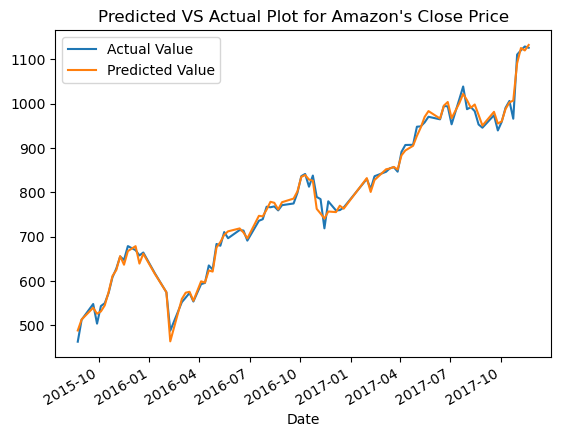


     ACTUAL VS PREDICTED VALUE TABLE FOR Amazon's Data       
                          Actual Value  Predicted Value Differences
Date                                                               
Monday, 24 August 2015      463.369995       488.662262  -25.292267
Monday, 31 August 2015      512.890015       513.418396   -0.528381
Monday, 21 September 2015   548.390015       539.895935     8.49408
Monday, 28 September 2015   504.059998       526.387634  -22.327637
Monday, 05 October 2015     543.679993       531.602417   12.077576
...                                ...              ...         ...
Monday, 23 October 2017     966.299988      1007.266785  -40.966797
Monday, 30 October 2017    1110.849976      1091.474854   19.375122
Monday, 06 November 2017   1120.660034      1125.672363   -5.012329
Monday, 13 November 2017   1129.170044      1120.239502    8.930542
Monday, 20 November 2017   1126.310059      1132.586548   -6.276489

[88 rows x 3 columns]
3/3 [=========================

In [ ]:
# Evaluate the model with tuning results
eval_result_AMAZON_tuned, tuned_prediction_result = evaluate_model(best_model,x_test_amzn ,y_test_amzn,y_test_dated_amzn, 'Amazon')

- The graph above shows the comparison of actual values with predicted values using a model that has been **tuned**.

- Next, the table `ACTUAL VS PREDICTED VALUE TABLE FOR Amazon's Data` shows that the predicted value is as requested in the question, namely for every Monday. From this table it can actually be seen that the **tuned model produces a smaller difference in values between *actual* and *predicted* (column *Differences*) compared to the model with the LSTM architecture.**

- The tuned model produces an RMSE value of 12.08, an MAE value of 9.1 and a MAPE value of 1.2 on Amazon data.

#### **Evaluation of the baseline model and the tuned model (Compared)**

In [ ]:
#Create a dataframe to make it easier to see the comparison of MAE, RMSE and MAPE values ​​from a model with a baseline architecture vs a model that has been tuned
baseline_vs_tuned = pd.DataFrame(np.array([['MAE','RMSE','MAPE'],eval_result_AMAZON_baseline,eval_result_AMAZON_tuned]).T, columns=['Metric','Baseline','Tuned'])

baseline_vs_tuned.reset_index(drop=True)
print('EVALUATION METRICS BETWEEN BASELINE AND TUNED MODEL FOR AMAZON DATA')
baseline_vs_tuned

EVALUATION METRICS BETWEEN BASELINE AND TUNED MODEL FOR AMAZON DATA


,Metric,Baseline,Tuned
0,MAE,21.88553,9.1047735
1,RMSE,27.701843,12.080417
2,MAPE,2.9035044,1.2060512



Explanation of the evaluation results for Amazon data:

The baseline LSTM architecture model has an MAE (Mean Absolute Error) value of 21.9, an RMSE (Root Mean Square Error) value of 27.7, and an MAPE (Mean Absolute Percentage Error) value of 2.9. In contrast, the tuned model produced an MAE value of 9.1, an RMSE value of 12.08, and an MAPE value of 1.2.

These results indicate that the tuned model performs better than the baseline LSTM architecture model. This is because the MAE, RMSE, and MAPE values in the tuned model have decreased or are lower compared to those in the baseline LSTM architecture model (Smaller MAE, RMSE, and MAPE values indicate better model performance).

Below is a plot illustrating the **actual values**, **predicted values from the Model 1 (LSTM architecture model)**, and **predicted values from the tuned model**:

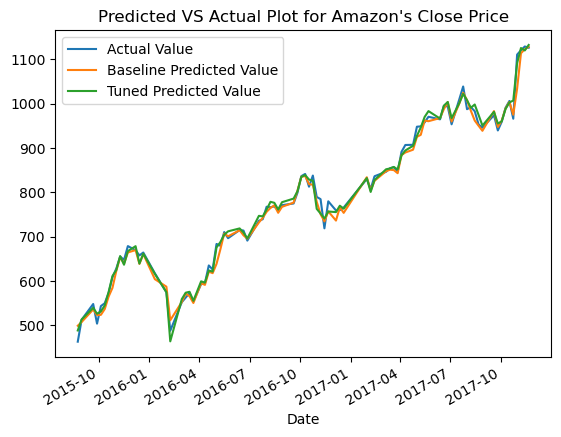

In [ ]:
actual_df = pd.DataFrame(y_test_dated_amzn, columns=['Date', 'Actual Value']).set_index('Date')
actual_df['Baseline Predicted Value'] = baseline_pred_result
actual_df['Tuned Predicted Value'] = tuned_prediction_result
pl = actual_df.plot()
plt.title('Predicted VS Actual Plot for {0}\'s Close Price'.format('Amazon'))
lines, labels = pl.get_legend_handles_labels()
pl.legend(lines[:3], labels[:3])
plt.show()

Furthermore, from the above graph, **it is evident that the tuned model produces a predicted value line that closely follows the actual value line compared to the model with the baseline LSTM architecture.**

### **Cisco Data**

#### Model 1 (LSTM) Evaluation

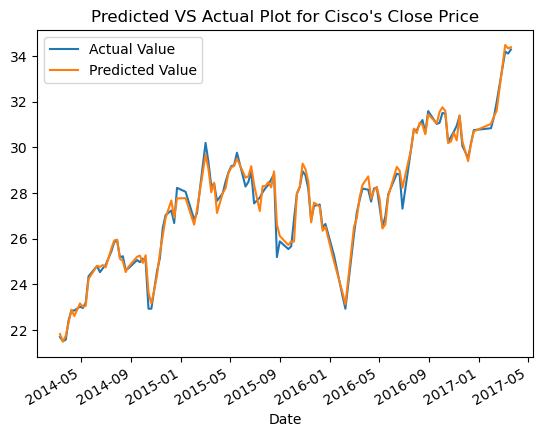


     ACTUAL VS PREDICTED VALUE TABLE FOR Cisco's Data       
                         Actual Value  Predicted Value Differences
Date                                                              
Monday, 10 March 2014       21.690001        21.820942   -0.130941
Monday, 17 March 2014           21.51        21.485510     0.02449
Monday, 24 March 2014           21.57        21.741102   -0.171103
Monday, 31 March 2014           22.42        22.311815    0.108185
Monday, 07 April 2014           22.85        22.886915   -0.036915
...                               ...              ...         ...
Monday, 06 February 2017    31.299999        31.335760   -0.035761
Monday, 13 February 2017    31.969999        31.596079     0.37392
Monday, 06 March 2017       34.189999        34.476517   -0.286518
Monday, 13 March 2017       34.099998        34.329281   -0.229282
Monday, 20 March 2017       34.279999        34.379292   -0.099293

[118 rows x 3 columns]
4/4 [==============================] - 0s 6

In [ ]:
# Evaluate the model with the LSTM architecture
eval_result_CISCO_baseline, baseline_pred_result_CISCO =  evaluate_model(cisco_baseline_model,x_test_csco ,y_test_csco,y_test_dated_csco, 'Cisco')

- The graph above shows the comparison of actual values with predicted values using the baseline LSTM architectural model.

- Next, the table `ACTUAL VS PREDICTED VALUE TABLE FOR Cisco's Data` shows that the predicted value is as requested in the question, namely for every Monday.

- The model with the LSTM baseline architecture produces an RMSE value of 0.3046, an MAE value of 0.2159 and a MAPE value of 0.7934 on Cisco data.

#### **Tuned Model Evaluation**

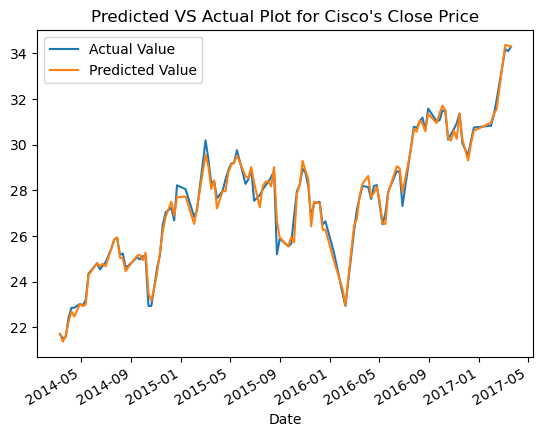


     ACTUAL VS PREDICTED VALUE TABLE FOR Cisco's Data       
                         Actual Value  Predicted Value Differences
Date                                                              
Monday, 10 March 2014       21.690001        21.709608   -0.019608
Monday, 17 March 2014           21.51        21.362722    0.147278
Monday, 24 March 2014           21.57        21.636415   -0.066416
Monday, 31 March 2014           22.42        22.234961     0.18504
Monday, 07 April 2014           22.85        22.696304    0.153696
...                               ...              ...         ...
Monday, 06 February 2017    31.299999        31.351982   -0.051983
Monday, 13 February 2017    31.969999        31.553173    0.416826
Monday, 06 March 2017       34.189999        34.369946   -0.179947
Monday, 13 March 2017       34.099998        34.343433   -0.243435
Monday, 20 March 2017       34.279999        34.305679   -0.025681

[118 rows x 3 columns]
4/4 [==============================] - 0s 9

In [ ]:
# Evaluate the model with tuning results
eval_result_CISCO_tuned, tuned_prediction_result_CISCO = evaluate_model(best_model_csco,x_test_csco ,y_test_csco,y_test_dated_csco, 'Cisco')

- The graph above shows the comparison of actual values with predicted values using a model that has been **tuned**.

- Next, the table `ACTUAL VS PREDICTED VALUE TABLE FOR Cisco's Data' shows that the predicted value is as requested in the question, namely for every Monday. From this table it can actually be seen that the **tuned model produces a smaller difference in values between *actual* and *predicted* (column *Differences*) compared to the model with the baseline architecture.**

- The tuned model produces an RMSE value of 0.3027, an MAE value of 0.2126 and a MAPE value of 0.7791 on Cisco data.

#### Evaluation of the baseline model and the tuned model (Compared)

In [ ]:
# Create a dataframe to make it easier to see the comparison of MAE, RMSE and MAPE values ​​from a model with a baseline architecture vs a model that has been tuned
baseline_vs_tuned_csco = pd.DataFrame(np.array([['MAE','RMSE','MAPE'],eval_result_CISCO_baseline,eval_result_CISCO_tuned]).T, columns=['Metric','Baseline','Tuned'])

baseline_vs_tuned_csco.reset_index(drop=True)
print('EVALUATION METRICS BETWEEN BASELINE AND TUNED MODEL FOR CISCO DATA')
baseline_vs_tuned_csco

EVALUATION METRICS BETWEEN BASELINE AND TUNED MODEL FOR CISCO DATA


,Metric,Baseline,Tuned
0,MAE,0.21593419,0.21261208
1,RMSE,0.30460057,0.30279186
2,MAPE,0.79343134,0.7791481



Explanation of the evaluation results for Cisco data:

The baseline LSTM architecture model has an MAE (Mean Absolute Error) value of 0.2159, an RMSE (Root Mean Square Error) value of 0.3046, and an MAPE (Mean Absolute Percentage Error) value of 0.7934. In contrast, the tuned model produced an MAE value of 0.2126, an RMSE value of 0.3028, and an MAPE value of 0.7791.

These results indicate that the tuned model performs better than the baseline LSTM architecture model. This is because the MAE, RMSE, and MAPE values in the tuned model have decreased or are slightly lower compared to those in the baseline LSTM architecture model (Smaller MAE, RMSE, and MAPE values indicate better model performance). Although the tuned model only produces slightly lower and non-significant MAE, RMSE, and MAPE values compared to the baseline architecture model, the tuned model still delivers better performance.

Below is a plot illustrating the **actual values**, **predicted values from the Model 1 (LSTM architecture model)**, and **predicted values from the tuned model**:

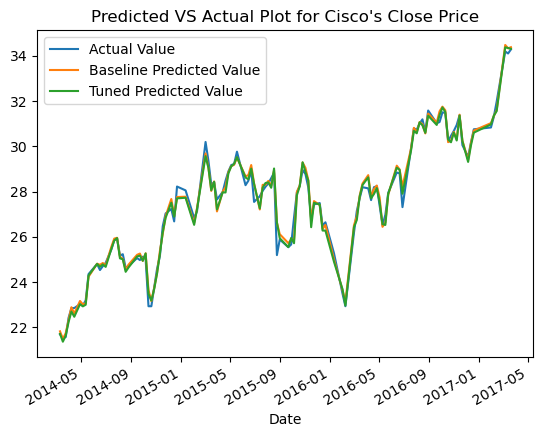

In [ ]:
actual_df = pd.DataFrame(y_test_dated_csco, columns=['Date', 'Actual Value']).set_index('Date')
actual_df['Baseline Predicted Value'] = baseline_pred_result_CISCO
actual_df['Tuned Predicted Value'] = tuned_prediction_result_CISCO
pl = actual_df.plot()
plt.title('Predicted VS Actual Plot for {0}\'s Close Price'.format('Cisco'))
lines, labels = pl.get_legend_handles_labels()
pl.legend(lines[:3], labels[:3])
plt.show()


Furthermore, from the above graph, **it is also evident that the tuned model produces a predicted value line that is slightly closer to the actual value line compared to the model with the baseline LSTM architecture.**

**Evaluation for both Amazon and Cisco data:**

From the models that have been built, trained, and evaluated, it can be seen that the model trained with **Cisco data performs better with lower values of MAE, RMSE, and MAPE compared to the model trained with Amazon data.** **This could be attributed to the fact that Cisco has a larger amount of data compared to Amazon due to Cisco being established earlier than Amazon. Cisco's data consists of 7,589 data points, while Amazon has only 5,758 data points. Cisco has been collecting this stock data since 1990, whereas Amazon's data starts from 1997 (as seen from the date range of the stock data).**